# Project 1: Training a Simple Neural Network with GPU

## Introduction

In this project, you will create, train, and evaluate a simple neural network using both TensorFlow and PyTorch. The objective is to ensure you are comfortable with setting up a neural network and utilizing GPU acceleration for training. You will use the MNIST dataset for this project.

## Objectives

1. Set up TensorFlow and PyTorch environments.
2. Verify GPU availability.
3. Implement a simple neural network in TensorFlow and PyTorch.
4. Train and evaluate the models.
5. Answer assessment questions.

## Instructions

Follow the steps below to complete the project. Ensure that you use a GPU to train your models.

---

### Step 1: Set Up Your Environment

First, install the necessary libraries. Run the following cell to install TensorFlow and PyTorch.


Provide snapshots from your environment showing:
1) You are using a virtual environment
2) You have installed `TensorFlow` and `PyTorch`

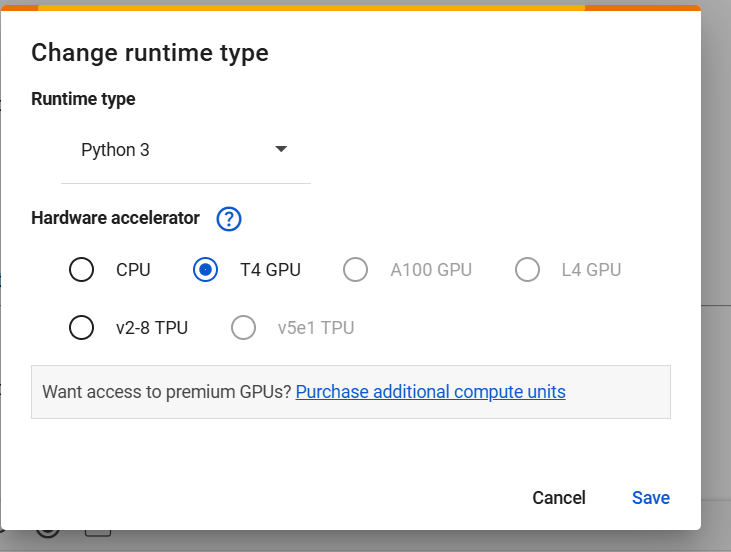

---

### Step 2: Verify GPU Availability
Check if TensorFlow and PyTorch can detect the GPU.

Run the following two code blocks and show the output.

#### TensorFlow GPU Check

In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print("GPU is available for TensorFlow!")
else:
    print("No GPU found for TensorFlow.")


TensorFlow version: 2.17.1
GPU is available for TensorFlow!


#### PyTorch GPU Check

In [ ]:
import torch

print("PyTorch version:", torch.__version__)
if torch.cuda.is_available():
    print("GPU is available for PyTorch!")
else:
    print("No GPU found for PyTorch.")


PyTorch version: 2.5.1+cu121
GPU is available for PyTorch!


---

### Step 3: Implement and Train a Simple Neural Network
#### TensorFlow Implementation
1. Load and preprocess the MNIST dataset.
2. Define the neural network model.
3. Compile the model.
4. Train the model using the GPU.
5. Evaluate the model.

You need to complete and run the code. Show the complete output.


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
with tf.device('/GPU:0'):
    model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8816 - loss: 0.4185 - val_accuracy: 0.9589 - val_loss: 0.1371
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9658 - loss: 0.1180 - val_accuracy: 0.9686 - val_loss: 0.1021
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9762 - loss: 0.0780 - val_accuracy: 0.9747 - val_loss: 0.0807
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9827 - loss: 0.0556 - val_accuracy: 0.9745 - val_loss: 0.0811
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9882 - loss: 0.0411 - val_accuracy: 0.9762 - val_loss: 0.0739
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9904 - loss: 0.0336 - val_accuracy: 0.9770 - val_loss: 0.0758
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9924 - loss: 0.0255 - val_accuracy: 0.9769 - val_loss: 0.0737
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9943 - loss: 0.018

#### PyTorch Implementation
1. Load and preprocess the MNIST dataset.
2. Define the neural network model.
3. Define loss function and optimizer.
4. Train the model using the GPU.
5. Evaluate the model.

You need to complete and run the code. Show the complete output.


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')


Epoch [1/5], Loss: 0.1222
Epoch [2/5], Loss: 0.1781
Epoch [3/5], Loss: 0.0858
Epoch [4/5], Loss: 0.1475
Epoch [5/5], Loss: 0.2152
Test Accuracy: 96.52%


---
### Questions
Answer the following questions in detail.

1. What is the purpose of normalizing the input data in both TensorFlow and PyTorch implementations?
2. Explain the role of the activation function relu in the neural network.
3. Why is it important to use GPU for training neural networks?
4. Compare the training time and accuracy of the TensorFlow and PyTorch models. Which one performed better and why?


1. Normalizing the input data will eliminate the scale differentiation caused by different measurement units across selected features, especially when variances among the features have various range. By bring them into standard scale, the model will be more accurate and easier to identify the relationship between the input values, effective for meaningful comparison for features that make contribution to the learning process

2. The ReLu function introduces non-linearity to the model, allowing the network to learn complex relationship. It does that by setting negative inputs of the neutrons to zero and positive inputs of the netrons remain unchanged, which provides more sensitivity to the activation sum and avoid vanishing gradient problem happens to other type of activation functions, as no complicated transformation is required to learn complex relationship.

3. To satisfy the computational requirements of deep learning. The neutral networks involves billions of weights to be adjusted, which is tremendous. The GPU uses parallel process to break down into multiple subtasks distributed to each of thousands cores to handle specialized computation, making it much faster to process large data and reduce training time. Deep learning also needs to adjust weights through backpropagation, which requres complex mathematical calculation such as matrix calculation and convolution, while the GPU is initially used for graphic imagery, it also has the capability for performing such calculations to process large data much faster than CPU.

4. Based on training time and accuracy, TensorFlow performs better than PyTorch because TensorFlow is designed for handling large size data like MNIST, ideal for production environment for its scalability and reliability. PyTorch is more emphasize on ease of use and favors toward researchers and developers who demands flexibility for experimental model deployment, especially for scholar and scientific circles that uses small-medium scale data

---
### Submission
Submit a link to your completed Jupyter Notebook (e.g., on GitHub (private) or Google Colab) with all the cells executed, and answers to the assessment questions included at the end of the notebook.